In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display_functions import display
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_excel("./data/COVID-19-Constructed-Dataset-(PANEL).xlsx")  #read csv file and store in df

In [3]:
# Check dirty data
df.isnull().sum()

df

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,M,1,59065.137,0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,M,1,59065.137,0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,M,1,59065.137,0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1
3,1,0,6,M,1,59065.137,0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3
4,1,0,6,M,1,59065.137,0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,M,1,65783.633,1,2,3,3,0,73.328,67.403,87.349,70.828,64.903,84.849,0
8396,1400,1,12,M,1,65783.633,1,2,3,3,3,58.970,84.165,64.041,56.470,81.665,61.541,2
8397,1400,1,12,M,1,65783.633,1,2,3,3,3,51.975,82.905,77.368,49.475,80.405,74.868,3
8398,1400,1,12,M,1,65783.633,1,2,3,3,3,64.104,47.847,81.086,61.604,45.347,78.586,1


In [4]:
# fill the dirty data using each column average
df.fillna(method='ffill', inplace=True)

df.isnull().sum()

df

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,M,1,59065.137,0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,M,1,59065.137,0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,M,1,59065.137,0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1
3,1,0,6,M,1,59065.137,0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3
4,1,0,6,M,1,59065.137,0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,M,1,65783.633,1,2,3,3,0,73.328,67.403,87.349,70.828,64.903,84.849,0
8396,1400,1,12,M,1,65783.633,1,2,3,3,3,58.970,84.165,64.041,56.470,81.665,61.541,2
8397,1400,1,12,M,1,65783.633,1,2,3,3,3,51.975,82.905,77.368,49.475,80.405,74.868,3
8398,1400,1,12,M,1,65783.633,1,2,3,3,3,64.104,47.847,81.086,61.604,45.347,78.586,1


In [5]:
# Categorical Data change to Numeric Data
# 0 = Female, 1 = Male
encoder = OrdinalEncoder(dtype=np.int64)
X = pd.DataFrame(df['gender'])
encoder.fit(X)

# Deep copy (원본 데이터는 유지 한채로 복제본 생성)
data_select = df.copy()
data_select['gender'] = pd.DataFrame(encoder.transform(X))

# Verify the data has been changed appropriately
data_select

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,1,1,59065.137,0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,1,1,59065.137,0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,1,1,59065.137,0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1
3,1,0,6,1,1,59065.137,0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3
4,1,0,6,1,1,59065.137,0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,1,65783.633,1,2,3,3,0,73.328,67.403,87.349,70.828,64.903,84.849,0
8396,1400,1,12,1,1,65783.633,1,2,3,3,3,58.970,84.165,64.041,56.470,81.665,61.541,2
8397,1400,1,12,1,1,65783.633,1,2,3,3,3,51.975,82.905,77.368,49.475,80.405,74.868,3
8398,1400,1,12,1,1,65783.633,1,2,3,3,3,64.104,47.847,81.086,61.604,45.347,78.586,1


In [6]:
# 시험의 과목 성적을 합한 평균을 구함
data_select['total'] = (data_select['readingscore'] + data_select['writingscore'] + data_select[
    'mathscore'] + data_select['readingscoreSL'] + data_select['writingscoreSL'] + data_select[
                            'mathscoreSL']) / 6

data_select

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod,total
0,1,0,6,1,1,59065.137,0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2,78.042
1,1,0,6,1,1,59065.137,0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4,67.117
2,1,0,6,1,1,59065.137,0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1,76.104
3,1,0,6,1,1,59065.137,0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3,67.076
4,1,0,6,1,1,59065.137,0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0,75.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,1,65783.633,1,2,3,3,0,73.328,67.403,87.349,70.828,64.903,84.849,0,74.777
8396,1400,1,12,1,1,65783.633,1,2,3,3,3,58.970,84.165,64.041,56.470,81.665,61.541,2,67.809
8397,1400,1,12,1,1,65783.633,1,2,3,3,3,51.975,82.905,77.368,49.475,80.405,74.868,3,69.500
8398,1400,1,12,1,1,65783.633,1,2,3,3,3,64.104,47.847,81.086,61.604,45.347,78.586,1,63.095


In [7]:
# Each grade data is dropped because the average of the total grade was obtained
dropCol = ['readingscore', 'writingscore', 'mathscore', 'readingscoreSL', 'writingscoreSL', 'mathscoreSL']
data_select = data_select.drop(columns=dropCol)

data_select

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,timeperiod,total
0,1,0,6,1,1,59065.137,0,5,3,1,0,2,78.042
1,1,0,6,1,1,59065.137,0,5,3,1,0,4,67.117
2,1,0,6,1,1,59065.137,0,5,3,1,0,1,76.104
3,1,0,6,1,1,59065.137,0,5,3,1,0,3,67.076
4,1,0,6,1,1,59065.137,0,5,3,1,0,0,75.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,1,65783.633,1,2,3,3,0,0,74.777
8396,1400,1,12,1,1,65783.633,1,2,3,3,3,2,67.809
8397,1400,1,12,1,1,65783.633,1,2,3,3,3,3,69.500
8398,1400,1,12,1,1,65783.633,1,2,3,3,3,1,63.095


In [8]:
# timeperiod를 학기 대신 대면, 비대면 강의 여부로 구분
# 0 = 대면, 1 = 비대면
for i in range(len(data_select)):
    sumOnline = 0
    sumNonOnline = 0
    if data_select.loc[i, 'timeperiod'] < 3:
        data_select.loc[i, 'timeperiod'] = 0
    else:
        data_select.loc[i, 'timeperiod'] = 1

# dataFrame column name change
data_select.rename(columns={'timeperiod': 'online'}, inplace=True)

# Display data for appropriately checking
data_select

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,online,total
0,1,0,6,1,1,59065.137,0,5,3,1,0,0,78.042
1,1,0,6,1,1,59065.137,0,5,3,1,0,1,67.117
2,1,0,6,1,1,59065.137,0,5,3,1,0,0,76.104
3,1,0,6,1,1,59065.137,0,5,3,1,0,1,67.076
4,1,0,6,1,1,59065.137,0,5,3,1,0,0,75.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,1,65783.633,1,2,3,3,0,0,74.777
8396,1400,1,12,1,1,65783.633,1,2,3,3,3,0,67.809
8397,1400,1,12,1,1,65783.633,1,2,3,3,3,1,69.500
8398,1400,1,12,1,1,65783.633,1,2,3,3,3,0,63.095


In [9]:
# 각 학기별 데이터에서 학생 별 데이터 (대면, 비대면)에 따른 성적 데이터를 저장해둘 데이터프레임 생성
data_transform = (data_select.iloc[:, :11]).copy()
data_transform.drop_duplicates(['studentID'], inplace=True)  # 중복되는 학생 ID를 가진 dataset 삭제
data_transform.reset_index(inplace=True)  # 인덱스 초기화
data_transform.drop(columns=['index'], inplace=True)  # index column 제거

# 학생 당 (대면, 비대면)에 따른 성적 평균 합 구함
for i in range(1, len(data_transform) + 1):
    condition0 = (data_select.studentID == i) & (data_select.online == 0)
    condition1 = (data_select.studentID == i) & (data_select.online == 1)
    temp0 = data_select.loc[condition0]
    temp1 = data_select.loc[condition1]
    data_transform.loc[i - 1, "totalNotOnline"] = (temp0.loc[:, "total"].sum() / 3)
    data_transform.loc[i - 1, "totalOnline"] = (temp1.loc[:, "total"].sum() / 3)
    # data_transform.loc[i - 1, "differ"] = data_transform.loc[i - 1, "totalNotOnline"] - data_transform.loc[
    #     i - 1, "totalOnline"]

# Display data for appropriately checking
data_transform

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,totalNotOnline,totalOnline,differ
0,1,0,6,1,1,59065.137,0,5,3,1,0,76.685,67.317,9.368
1,2,0,6,1,1,107480.086,1,4,1,1,1,77.301,69.185,8.116
2,3,0,6,1,0,79800.844,1,0,2,1,1,80.267,68.905,11.362
3,4,0,6,1,1,125976.164,1,2,3,1,2,85.052,75.503,9.549
4,5,0,6,0,1,110744.156,1,5,2,0,1,80.709,70.265,10.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,1,12,0,1,19891.385,0,2,2,1,1,67.364,61.227,6.137
1396,1397,1,12,0,1,24009.490,0,1,1,1,1,69.427,55.968,13.459
1397,1398,1,12,1,0,35121.309,1,1,4,2,1,73.711,69.847,3.865
1398,1399,1,12,1,0,54383.434,1,2,2,1,1,77.285,67.355,9.930


#### Finding important variables to improve predictive model performance
-> Using SelectKBest with each scaler (Standard , Robust, MinMax)

In [24]:
# Scaler + SelectKBest
def seletKBest_scaling(data, scaler):
    x = data.iloc[:, 1:-1] # id, differ 제외
    x.drop(['gradelevel'], axis=1, inplace=True)  # gradelevel 요소 제외
    y = x.iloc[:, -1] # totalOnline
    scalerTemp = pd.DataFrame(scaler.fit_transform(x))

    scalerTemp.columns = [x.columns]

    bestfeatures = SelectKBest(score_func=f_regression, k=5)
    fit = bestfeatures.fit(x, y)
    dfcolumns = pd.DataFrame(x.columns)
    dfscores = pd.DataFrame(fit.scores_)

    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Score']

    return featureScores.nlargest(10, 'Score')

#### Standard + SelectKBest

In [25]:
# Standard + SelectKBest
print(seletKBest_scaling(data_transform, StandardScaler()))

          Features    Score
0           school 2408.646
9   totalNotOnline 2224.854
3  householdincome 1930.850
2         covidpos  352.592
5     numcomputers  295.265
4        freelunch  243.844
7       fathereduc   61.064
8       mothereduc   10.177
6       familysize    5.061
1           gender    2.326


#### Robust + SelectKBest

In [26]:
# Robust + SelectKBest
print(seletKBest_scaling(data_transform, RobustScaler()))

          Features    Score
0           school 2408.646
9   totalNotOnline 2224.854
3  householdincome 1930.850
2         covidpos  352.592
5     numcomputers  295.265
4        freelunch  243.844
7       fathereduc   61.064
8       mothereduc   10.177
6       familysize    5.061
1           gender    2.326


#### MinMax + SelectKBest

In [27]:
# MinMax + SelectKBest
print(seletKBest_scaling(data_transform, MinMaxScaler()))

          Features    Score
0           school 2408.646
9   totalNotOnline 2224.854
3  householdincome 1930.850
2         covidpos  352.592
5     numcomputers  295.265
4        freelunch  243.844
7       fathereduc   61.064
8       mothereduc   10.177
6       familysize    5.061
1           gender    2.326


<hr/>

# K-mean Clustering
## -> <b>Using clustering function each sclaing models to find best model</b>

1. Standard Scaling

2. Robust Scaling

3. MinMax Scaling

In [28]:
# K-mean Clustering + Scaling
def clustering_scaling(k, data, scaler):
    data_scale = scaler.fit_transform(data)  #data scaling
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scale)  # learning scaling data
    data['cluster'] = model.fit_predict(data_scale)  # save each clustering data

    plt.figure(figsize=(8, 8))

    for i in range(k):
        plt.scatter(data.loc[data['cluster'] == i, 'totalNotOnline'], data.loc[data['cluster'] == i, 'totalOnline'],
                    label='cluster ' + str(i))

    plt.legend()
    plt.title('cluster number: '+str(k))
    plt.xlabel('totalNotOnline', size=12)
    plt.ylabel('totalOnline', size=12)
    plt.show()

###### Standard Scaling + K-means Clustering

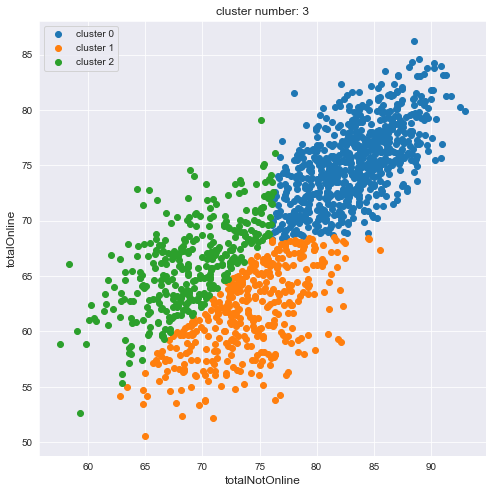

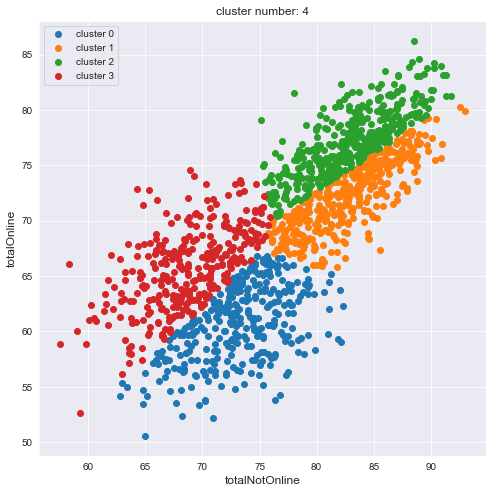

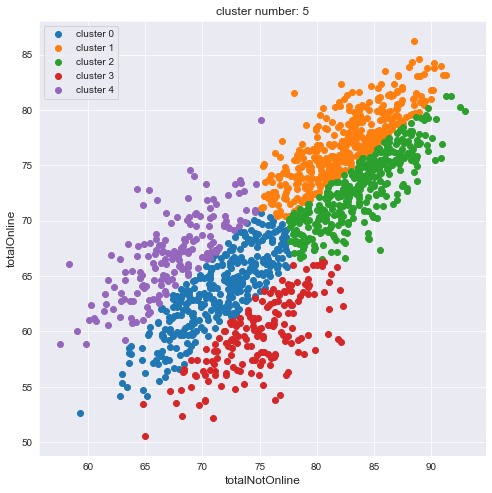

In [29]:
# Standard + Clustering
data_transform_std = data_transform.copy()
for i in range(3, 6):
    clustering_scaling(i, data_transform_std.iloc[:, -3:], StandardScaler())

###### Robust Scaling + K-means Clustering

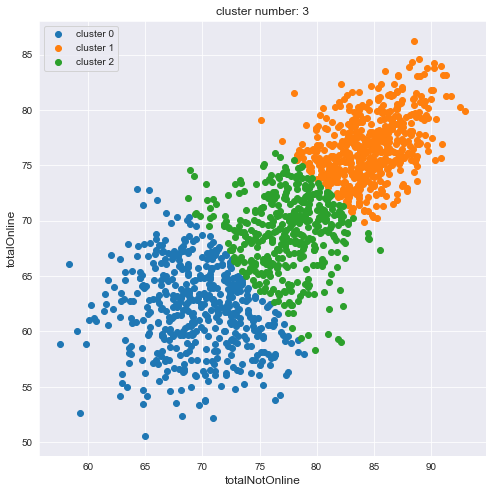

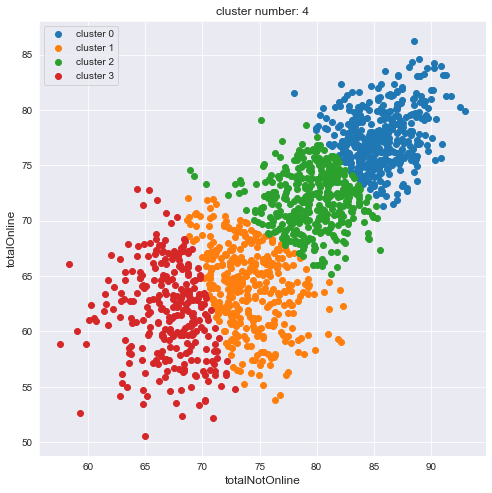

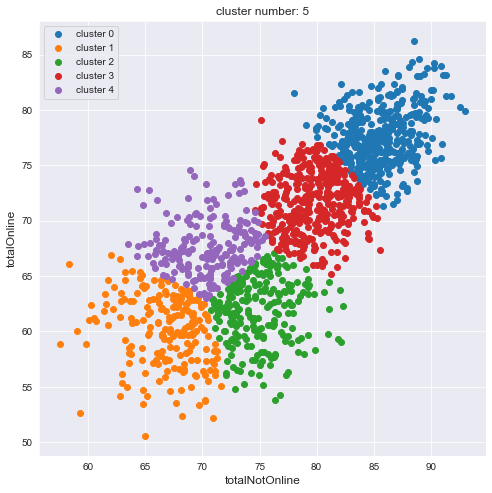

In [16]:
# Robust + Clustering
data_transform_robust = data_transform.copy()
for i in range(3, 6):
    clustering_scaling(i, data_transform_robust.iloc[:, -3:], RobustScaler())

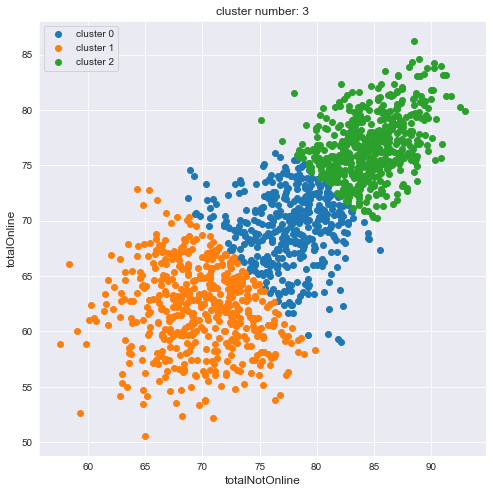

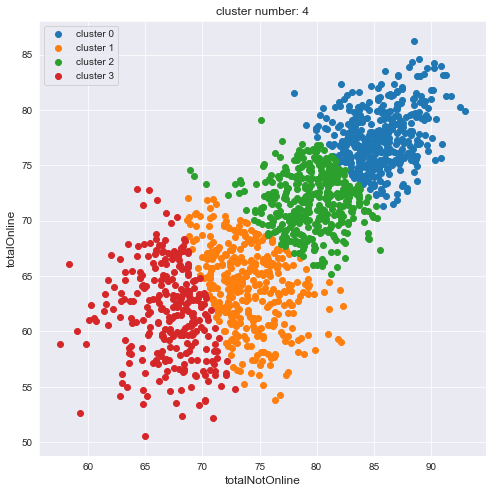

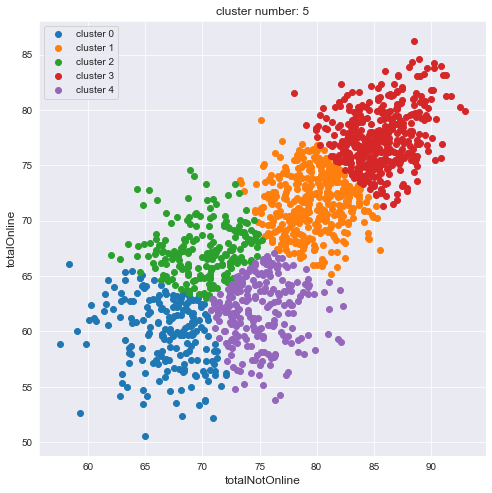

In [17]:
# MinMax + Clustering
data_transform_minmax = data_transform.copy()
for i in range(3, 6):
    clustering_scaling(i, data_transform_minmax.iloc[:, -3:], MinMaxScaler())

#### Graph: K-means Clustering & k=3
#### -> show the best

<hr>

# Robust Scaling + LinearRegression

In [18]:
def linearRegScaling(scaler, type, testSize):
    largeColumns = ("totalNotOnline", "totalOnline")
    dataset = [data_transform_std, data_transform_robust, data_transform_minmax]
    data_scale = scaler.fit_transform(dataset[type].loc[:, largeColumns])  #data scaling

    model = KMeans(n_clusters=3, random_state=42)
    model.fit(data_scale)  # learning scaling data
    data_transform_robust['cluster'] = model.fit_predict(data_scale)  # save each clustering data

    x = data_scale
    y = data_transform_robust.iloc[:, -1]  # Clustering classification

    reg = linear_model.LinearRegression()

    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testSize, random_state=42, shuffle=True)
    reg.fit(x_train, y_train)

    # Compute data and find result
    resultTrainScore = reg.score(x_train, y_train)
    resultTestScore = reg.score(x_test, y_test)

    # data collect
    return resultTrainScore, resultTestScore

In [19]:
# Split the dataset train:test & scaler
split = [0.1, 0.2, 0.3]
scaler = [StandardScaler(), RobustScaler(), MinMaxScaler()]

# 새로운 빈 데이터 프레임 생성
resultBestScaler = pd.DataFrame(index=range(0, 9),
                                columns=["Scaler", "Train", "Test", "TrainSet Score", "TestSet Score"])

j = 0
for i in range(len(scaler)):
    for k in range(len(split)):
        resultTrainScore, resultTestScore = linearRegScaling(scaler[i], k, split[k])
        resultBestScaler.iloc[j] = [str(scaler[i]), str(1 - split[k]), str(split[k]), resultTrainScore, resultTestScore]
        j += 1

display(resultBestScaler)

,Scaler,Train,Test,TrainSet Score,TestSet Score
0,StandardScaler(),0.9,0.1,0.872,0.851
1,StandardScaler(),0.8,0.2,0.873,0.855
2,StandardScaler(),0.7,0.3,0.875,0.858
3,RobustScaler(),0.9,0.1,0.243,0.203
4,RobustScaler(),0.8,0.2,0.251,0.185
5,RobustScaler(),0.7,0.3,0.257,0.193
6,MinMaxScaler(),0.9,0.1,0.231,0.253
7,MinMaxScaler(),0.8,0.2,0.233,0.236
8,MinMaxScaler(),0.7,0.3,0.235,0.229


#### -> Standard Scaling show best Score
<hr> <br/>

#### Use kFold to evaluate model performance

In [20]:
# Split the dataset into 5 subsets of equal size
kf5 = KFold(n_splits=5, shuffle=True, random_state=1)

In [21]:
def randomGridSearch(dataX, dataY, k):
    # 새로운 빈 데이터 프레임 생성
    resultRandomGridSearch = pd.DataFrame(index=range(0, 5),
                                          columns=["Split_Subset", "Scores_Mean", "Best Hyperparams", "Best Scores"])
    i = 1
    for train, test in kf5.split(dataX):
        splitData = i

        x_train, x_test = dataX[train], dataX[test]
        y_train, y_test = dataY[train], dataY[test]

        knnCV = KNeighborsClassifier(n_neighbors=k)  # neighbor 의 수

        scores = cross_val_score(knnCV, x_train, y_train, cv=5)  # 교차 검증을 위한 메서드 (default cv=5)로 5번 검증
        scoresMeans = np.mean(scores)

        parameter = {'n_neighbors': np.arange(1, 25)}

        knn = KNeighborsClassifier()
        knnRS = RandomizedSearchCV(knn, parameter, cv=5, scoring="accuracy")  # 만족 할만한 하이퍼파라미터들의 조합을 찾을 때까지 조정하며 서치
        knnRS.fit(x_train, y_train)

        bestParams = (knnRS.best_params_['n_neighbors'])
        bestScores = knnRS.best_score_

        resultRandomGridSearch.iloc[i - 1, :] = [splitData, scoresMeans, bestParams, bestScores]  # Dataframe 데이터 추가

        i = i + 1

    return resultRandomGridSearch

In [22]:
# Scaling 영향이 큰 2개의 feature 만을 가지고 dataScaling
largeColumns = ("totalNotOnline", "totalOnline")
data_scale = StandardScaler().fit_transform(data_transform_std.loc[:, largeColumns])  #data scaling
model = KMeans(n_clusters=3, random_state=42)  # 3개의 cluster 개수
model.fit(data_scale)  # learning scaling data
data_transform_robust['cluster'] = model.fit_predict(data_scale)  # save each clustering data

x = data_scale  #"totalNotOnline", "totalOnline" columns data
y = data_transform_robust.iloc[:, -1]  # Clustering classification

#display(data_transform_robust)  # data_transform_robust dataframe 상태

In [23]:
display(randomGridSearch(x, y, 3))

,Split_Subset,Scores_Mean,Best Hyperparams,Best Scores
0,1,0.982,1,0.985
1,2,0.983,1,0.986
2,3,0.987,5,0.989
3,4,0.979,1,0.986
4,5,0.982,1,0.992


In [21]:
def randomGridSearch(dataX, dataY, k):
    # 새로운 빈 데이터 프레임 생성
    resultRandomGridSearch = pd.DataFrame(index=range(0, 5),
                                          columns=["Split_Subset", "Scores_Mean", "Best Hyperparams", "Best Scores"])
    i = 1
    for train, test in kf5.split(dataX):
        splitData = i

        x_train, x_test = dataX[train], dataX[test]
        y_train, y_test = dataY[train], dataY[test]

        knnCV = KNeighborsClassifier(n_neighbors=k)  # neighbor 의 수

        scores = cross_val_score(knnCV, x_train, y_train, cv=5)  # 교차 검증을 위한 메서드 (default cv=5)로 5번 검증
        scoresMeans = np.mean(scores)

        parameter = {'n_neighbors': np.arange(1, 25)}

        knn = KNeighborsClassifier()
        knnRS = RandomizedSearchCV(knn, parameter, cv=5, scoring="accuracy")  # 만족 할만한 하이퍼파라미터들의 조합을 찾을 때까지 조정하며 서치
        knnRS.fit(x_train, y_train)

        bestParams = (knnRS.best_params_['n_neighbors'])
        bestScores = knnRS.best_score_

        resultRandomGridSearch.iloc[i - 1, :] = [splitData, scoresMeans, bestParams, bestScores]  # Dataframe 데이터 추가

        i = i + 1

    return resultRandomGridSearch

In [22]:
# Scaling 영향이 큰 2개의 feature 만을 가지고 dataScaling
largeColumns = ("totalNotOnline", "totalOnline")
data_scale = StandardScaler().fit_transform(data_transform_std.loc[:, largeColumns])  #data scaling
model = KMeans(n_clusters=3, random_state=42)  # 3개의 cluster 개수
model.fit(data_scale)  # learning scaling data
data_transform_robust['cluster'] = model.fit_predict(data_scale)  # save each clustering data

x = data_scale  #"totalNotOnline", "totalOnline" columns data
y = data_transform_robust.iloc[:, -1]  # Clustering classification

#display(data_transform_robust)  # data_transform_robust dataframe 상태

In [23]:
display(randomGridSearch(x, y, 3))

,Split_Subset,Scores_Mean,Best Hyperparams,Best Scores
0,1,0.982,9,0.985
1,2,0.983,5,0.985
2,3,0.987,3,0.987
3,4,0.979,1,0.986
4,5,0.982,5,0.985
